## Bem-vindo! 

##### Esse projeto visa simular um corpo em queda livre, sob a ação da resistência do ar, ou não, com o intuito de analisar os princípios de conservação e dissipação de energia (proposta de projeto 4)

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas nativas usadas:** Math 

**Bibliotecas externas usadas:** Numpy e Matplotlib 

**Constante usada para aceleração da gravidade:**  9,8 m/s² 


### Instruções de Uso:

1.  **Execute as células em ordem:** Comece pela primeira célula de código (importação de bibliotecas) e execute-as sequencialmente.
    * *Atalho: Pressione `Shift + Enter` para executar uma célula e ir para a próxima.*
2.  **Execute tudo de uma vez (Opcional):**
    * Se preferir, você pode ir ao menu superior e selecionar `Run` > `Run All Cells` (Executar Tudo).
    * Isso irá limpar todas as saídas anteriores, pedir os dados de entrada e executar o notebook do início ao fim.
3.  **Insira os dados de entrada:** Ao executar a segunda célula de código (`declarando os valores iniciais`), você precisará digitar três valores:
    * **Massa (Kg):** A massa do objeto (ex: `80`).
    * **Altura (m):** A altura inicial da queda (ex: `100`).
    * **Coeficiente de Arrasto (k):** Este é o valor mais importante para a análise.
    * ***(Nota sobre decimais):** Você pode inserir números com casas decimais usando tanto **vírgula** (ex: `0,5`) quanto **ponto** (ex: `0.5`).*
4.  **Entendendo o Coeficiente `k`:**
    * **`k = 0`**: Simula uma **queda livre ideal** (no vácuo). Você verá que a energia total se conserva.
    * **`k > 0`**: Simula uma **queda com resistência do ar** (ex: `0.2` ou `0.7`). Você verá a energia total diminuir e um gráfico de energia dissipada aparecer.
5.  **Analise os resultados:** As últimas células irão calcular e exibir os gráficos de energia (Potencial, Cinética e Dissipada) com base nos valores que você forneceu.
6.  **Aviso sobre Overflow (Erro de Estouro):**    
    * O código possui uma trava de segurança (`OverflowError`) para cálculos com resistência do ar (k > 0).    
    * Se os valores de **altura (`h`)** e **coeficiente (`k`)** forem **muito altos** ao mesmo tempo em que a **massa (`m`)** for **muito baixa**, a simulação será interrompida para evitar um erro de estouro matemático. 
    * Se isso acontecer, execute o notebook novamente (`Run` > `Run All Cells`) com valores mais equilibrados.

In [65]:
# importando bibliotecas:
import math
import numpy as np
import matplotlib.pyplot as plt

# funções:
def ler_valor(string):
    return float(input(string).replace(',', '.')) # função replace() para permitir que o usuário insira um número com casas decimais com separação por vírgula
def plotar_grafico(valores_x, valores_y, titulo, rotulo_x, rotulo_y):
    fig, ax = plt.subplots()
    ax.plot(valores_x, valores_y)
    ax.set_title(titulo)
    ax.set_xlabel(rotulo_x)
    ax.set_ylabel(rotulo_y)
    plt.grid(True)
    plt.show()

In [66]:
# lendo e declarando os valores iniciais:
g = 9.8 # declarando constante de aceleração da gravidade

m_objeto = ler_valor("Insira a massa do objeto (Kg): ") # lendo valor da massa do objeto
while (m_objeto <= 0): # verificando se há erros para o valor da massa
    m_objeto = ler_valor("Valor inválido para a massa do objeto (Kg). Insira um novo valor maior que zero: ") # lendo novamente o valor em caso de erro

h_objeto = ler_valor("Insira a distância entre o objeto e o chão (m): ") # lendo valor da distância do objeto em relação ao chão
while (h_objeto <= 0): # verificando se há erros para o valor da altura
    h_objeto = ler_valor("Valor inválido para a distância do objeto ao chão (m). Insira um novo valor maior que zero: ") # lendo novamente o valor em caso de erro

k = ler_valor("Insira o coeficiente de arrasto (0 para ignorar a resistência do ar): ") # lendo coeficiente de arrasto
while (k < 0): # verificando se há erros para o coeficiente de arrasto
    k = ler_valor("Valor inválido para o coeficiente de arrasto. Insira um novo valor maior ou igual a zero") # lendo novamente o valor em caso de erro

# verificando se há um erro de desproporção entre as medidas:
if (k * h_objeto) / m_objeto >= 700: # verificando erros de desproporção extrema entre os valores
    raise OverflowError("ERRO: A combinação de k, altura e massa é muito extrema e causa um Overflow. Rode o código novamente e tente novos valores.") # exibindo mensagem de erro

In [67]:
# implementando resistência do ar:
if (k != 0): # Considerando resistência do ar no cálculo da altura durante a queda:
    v_terminal = math.sqrt(m_objeto * g / k) # velocidade terminal
    
    termo_exp = math.exp((g * h_objeto) / (v_terminal**2)) # uma variável auxiliar para calcular o tempo real de queda, em segundos, considerando a resistência do ar 
    t_final = (v_terminal / g) * math.acosh(termo_exp) # calculando o tempo final de queda, considerando a resistência do ar
    t_queda = np.linspace(0, t_final, num=1000) # tempo de queda em 1000 instantes do movimento
    
    v = v_terminal * np.tanh((g / v_terminal) * t_queda) # velocidade do objeto ao longo do movimento
    
    h_t = h_objeto - (m_objeto / k) * np.log(np.cosh((k / m_objeto) * t_queda * v_terminal)) # altura do objeto em função do tempo
    h_t = np.maximum(h_t, 0.0) # limitando a altura a zero (para que o objeto não atravesse o chão após o impacto)
    
else: # Desconsiderando resistência do ar no cálculo da altura durante a queda.
    t_final = math.sqrt(2 * h_objeto / g) # tempo de queda final, em segundos
    t_queda = np.linspace(0, t_final, num=1000) # tempo de queda em 1000 instantes do movimento

    h_t = h_objeto - 0.5 * g * t_queda**2 # computando altura como função do tempo sob a queda livre
    h_t = np.maximum(h_t, 0.0) # limitando a altura a zero (para que o objeto não atravesse o chão após o impacto)

    v = g * t_queda # velocidade do objeto ao longo do movimento

# calculando energia cinética e potencial:
energia_cinetica = 0.5 * m_objeto * v ** 2 # cálculo da energia cinética nos diversos instantes movimento
energia_potencial = m_objeto * g * h_t # energia potencial gravitacional nos diversos instantes do movimento

# verificando se há dissipação de energia
energia_total = energia_potencial + energia_cinetica # calculando energia total do sistema, somando energia potencial e cinética
energia_dissipada = m_objeto * g * h_objeto - energia_total # calculando a energia dissipada pela resistência do ar
energia_total_constante = np.allclose(energia_total, energia_total[0]) # verificando se a energia total do sistema é constante


--- Resultados dos Cálculos ---
Massa: 15.00 kg
Altura: 35.00 m
Tempo de queda: 2.88 s
Velocidade final: 21.12 m/s
Energia Potencial (no início do movimento): 5145.00 J
Energia Cinética (no final do movimento): 3344.76 J
Energia Dissipada (total): 1800.24 J
---------------------------------


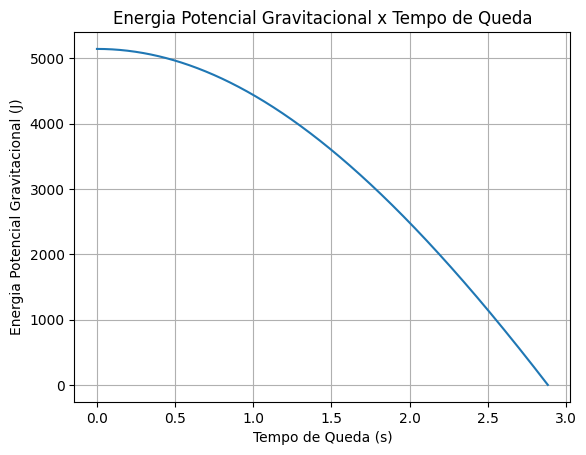

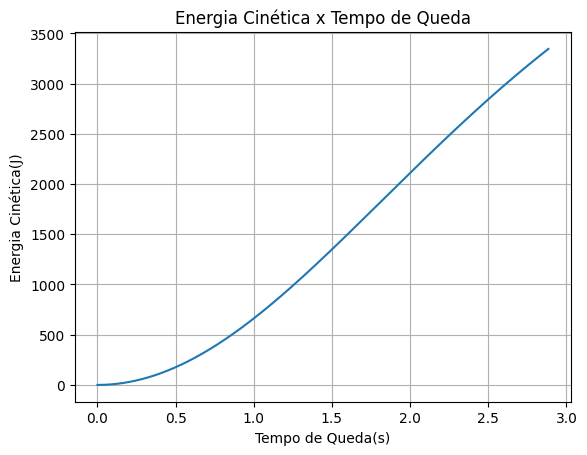

A energia total do sistema não é constante, logo há alguma perda de energia (devido à resistência do ar).


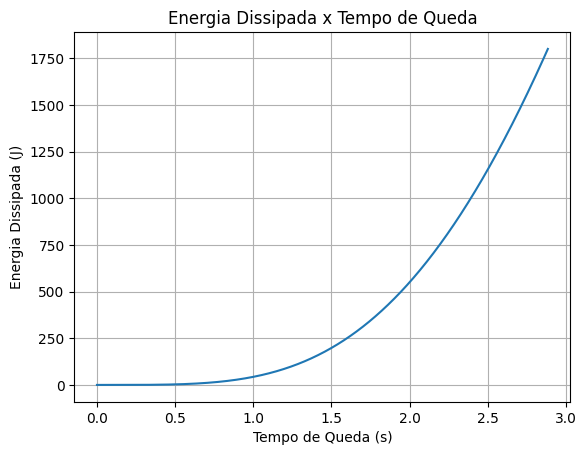

In [68]:
# Exibindo os resultados calculados para o usuário:
print("\n--- Resultados dos Cálculos ---")
print(f"Massa: {m_objeto:.2f} kg")
print(f"Altura: {h_objeto:.2f} m")
print(f"Tempo de queda: {t_final:.2f} s")
print(f"Velocidade final: {v[999]:.2f} m/s")
print(f"Energia Potencial (no início do movimento): {energia_potencial[0]:.2f} J")
print(f"Energia Cinética (no final do movimento): {energia_cinetica[999]:.2f} J")
if (not energia_total_constante): 
    print(f"Energia Dissipada (total): {round(energia_dissipada[999], 10):.2f} J")
print("---------------------------------")

# plotando gŕaficos:
plotar_grafico(t_queda, energia_potencial, "Energia Potencial Gravitacional x Tempo de Queda", "Tempo de Queda (s)", "Energia Potencial Gravitacional (J)") # energia potencial em função do tempo de queda
plotar_grafico(t_queda, energia_cinetica, "Energia Cinética x Tempo de Queda", "Tempo de Queda(s)", "Energia Cinética(J)") # energia cinética em função do tempo de queda

# estrutura condicional para informar se a energia total do sistema é constante ou não. Se não for, plota o gráfico da energia dissipada
if (energia_total_constante):
    print("A energia total do sistema é constante ao longo do tempo, conforme esperado pela conservação de energia.")
else:
    print("A energia total do sistema não é constante, logo há alguma perda de energia (devido à resistência do ar).")
    # plotando gráfico de dissipação da energia:
    plotar_grafico(t_queda, energia_dissipada, "Energia Dissipada x Tempo de Queda", "Tempo de Queda (s)", "Energia Dissipada (J)")